<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-03-20 21:56:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-03-20 21:56:39 (15.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 8)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
# ONLY RUN THIS CELL IF YOU DON'T HAVE SEABORN.
#!conda install -c anaconda seaborn -y

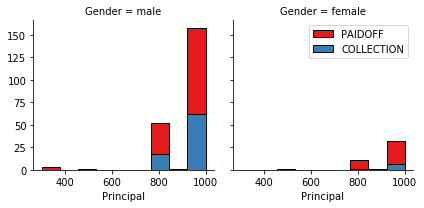

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

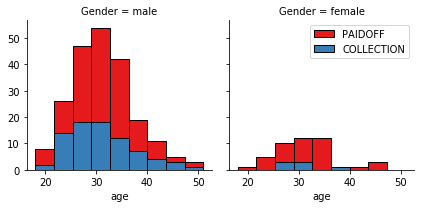

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Examine day of week a loan is taken out:

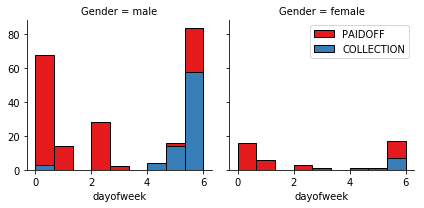

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
# Create a weekend variable
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
# Get the length of the loan
df['due_date'] = pd.to_datetime(df['due_date'])
df['loan_length'] = (df['due_date'] - df['effective_date'])
df['loan_length'] = df['loan_length'].apply(lambda x: x.days)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_length
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,29
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,29
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,14
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,29
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,29


In [13]:
# Create a variable for if their loan period is 1 month or greater
df['month+'] = df['loan_length'].apply(lambda x: int(np.where(x >= 29, 1, 0)))
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_length,month+
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,29,1
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,29,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,14,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,29,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,29,1


**Evaluate all variables' relationships to loan status:**

In [14]:
# Principal
df.groupby('loan_status')['Principal'].agg('mean')

loan_status
COLLECTION    958.139535
PAIDOFF       938.846154
Name: Principal, dtype: float64

There does not appear to be any real significant differences between the principal and the loan status.

In [15]:
# Loan Terms
pd.crosstab(df['terms'], df['loan_status']).apply(lambda x: x / x.sum(), axis=1)

loan_status,COLLECTION,PAIDOFF
terms,,
7,0.000000,1.000000
15,0.229730,0.770270
30,0.282609,0.717391


In [16]:
df['terms'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

We can binarize loan terms --> there is a split between >15 and <=15:

In [17]:
df['terms'] = df['terms'].apply(lambda x: np.where(x > 15, '>15', '<=15'))
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_length,month+
0,PAIDOFF,1000,>15,2016-09-08,2016-10-07,45,High School or Below,male,3,0,29,1
1,PAIDOFF,1000,>15,2016-09-08,2016-10-07,33,Bechalor,female,3,0,29,1
2,PAIDOFF,1000,<=15,2016-09-08,2016-09-22,27,college,male,3,0,14,0
3,PAIDOFF,1000,>15,2016-09-09,2016-10-08,28,college,female,4,1,29,1
4,PAIDOFF,1000,>15,2016-09-09,2016-10-08,29,college,male,4,1,29,1


In [18]:
df['terms'].value_counts(normalize=True)

>15     0.531792
<=15    0.468208
Name: terms, dtype: float64

In [19]:
# Now check:
pd.crosstab(df['terms'], df['loan_status']).apply(lambda x: x / x.sum(), axis=1)

loan_status,COLLECTION,PAIDOFF
terms,,
<=15,0.209877,0.790123
>15,0.282609,0.717391


In [20]:
# Education
pd.crosstab(df['education'], df['loan_status']).apply(lambda x: x / x.sum(), axis=1)

loan_status,COLLECTION,PAIDOFF
education,,
Bechalor,0.250000,0.750000
High School or Below,0.258278,0.741722
Master or Above,0.500000,0.500000
college,0.234899,0.765101


In [21]:
df = df[df['education'] != 'Master or Above']  # Remove because there are excatly 2 master's cases, 1 in each class.

There is not significant variance by education.

In [22]:
# Gender
pd.crosstab(df['Gender'], df['loan_status']).apply(lambda x: x / x.sum(), axis=1)

loan_status,COLLECTION,PAIDOFF
Gender,,
female,0.134615,0.865385
male,0.267123,0.732877


Women **do** appear **more likely** to pay off their loans on time.

In [23]:
# Age
df.groupby('loan_status')['age'].agg('mean')

loan_status
COLLECTION    30.423529
PAIDOFF       31.003861
Name: age, dtype: float64

No significant differences by age.

In [24]:
# Length of Loan
pd.crosstab(df['month+'], df['loan_status']).apply(lambda x: x / x.sum(), axis=1)

loan_status,COLLECTION,PAIDOFF
month+,,
0,0.192053,0.807947
1,0.290155,0.709845


There **does** appear to be differences between the length of a loan and the likelihood of it being paid off.

In [25]:
# Weekend
pd.crosstab(df['weekend'], df['loan_status']).apply(lambda x: x / x.sum(), axis=1)

loan_status,COLLECTION,PAIDOFF
weekend,,
0,0.021277,0.978723
1,0.403941,0.596059


Weekend loans **do** appear more likely to go into collections.

In [26]:
# Day of Week
pd.crosstab(df['dayofweek'], df['loan_status']).apply(lambda x: x / x.sum(), axis=1)

loan_status,COLLECTION,PAIDOFF
dayofweek,,
0,0.034483,0.965517
1,0.000000,1.000000
2,0.000000,1.000000
3,0.000000,1.000000
4,0.500000,0.500000
5,0.451613,0.548387
6,0.390244,0.609756


We've accounted for the variance in this variable with the weekend variable.<br><br>
**Features to Select:**
- Terms
- Gender
- Lengh of Loan (month+)
- Weekend

## Convert Categorical features to numerical values

In [27]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_length,month+
0,PAIDOFF,1000,>15,2016-09-08,2016-10-07,45,High School or Below,0,3,0,29,1
1,PAIDOFF,1000,>15,2016-09-08,2016-10-07,33,Bechalor,1,3,0,29,1
2,PAIDOFF,1000,<=15,2016-09-08,2016-09-22,27,college,0,3,0,14,0
3,PAIDOFF,1000,>15,2016-09-09,2016-10-08,28,college,1,4,1,29,1
4,PAIDOFF,1000,>15,2016-09-09,2016-10-08,29,college,0,4,1,29,1


In [28]:
df['terms'].replace(to_replace=['>15','<=15'], value=[0,1], inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,loan_length,month+
0,PAIDOFF,1000,0,2016-09-08,2016-10-07,45,High School or Below,0,3,0,29,1
1,PAIDOFF,1000,0,2016-09-08,2016-10-07,33,Bechalor,1,3,0,29,1
2,PAIDOFF,1000,1,2016-09-08,2016-09-22,27,college,0,3,0,14,0
3,PAIDOFF,1000,0,2016-09-09,2016-10-08,28,college,1,4,1,29,1
4,PAIDOFF,1000,0,2016-09-09,2016-10-08,29,college,0,4,1,29,1


### Feature selection

Lets define feature sets, X:

In [29]:
X = df[['Gender', 'terms', 'month+', 'weekend']]
X = pd.concat([X, pd.get_dummies(df['education'])], axis=1)
X[0:5]

,Gender,terms,month+,weekend,Bechalor,High School or Below,college
0,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0
2,0,1,0,0,0,0,1
3,1,0,1,1,0,0,1
4,0,0,1,1,0,0,1


What are our lables?

In [30]:
y = df['loan_status'].values
y[::-10]

array(['COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [31]:
#X = preprocessing.StandardScaler().fit(X).transform(X) || all predictors are binary, do NOT normalize.
X[0:5]

,Gender,terms,month+,weekend,Bechalor,High School or Below,college
0,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0
2,0,1,0,0,0,0,1
3,1,0,1,1,0,0,1
4,0,0,1,1,0,0,1


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

#### sk-learn evaluations:

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_similarity_score, f1_score, log_loss

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [34]:
%%time
from sklearn.neighbors import KNeighborsClassifier

models = []
model_acc = 0.0

ks = list(range(3,15+1))

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto').fit(X_train, y_train)
    yhat = knn.predict(X_test)
    rank = accuracy_score(y_test, yhat)
    models.append((k, rank))
    
    if rank > model_acc:
        model_acc = rank
        knn_fit = knn

CPU times: user 84 ms, sys: 8 ms, total: 92 ms
Wall time: 89.9 ms


In [35]:
xplot = []
yplot = []
for k,v in models:
    xplot.append(k)
    yplot.append(v)
    
ymax = max(yplot)
yin = yplot.index(ymax)
xmax = xplot[yin]

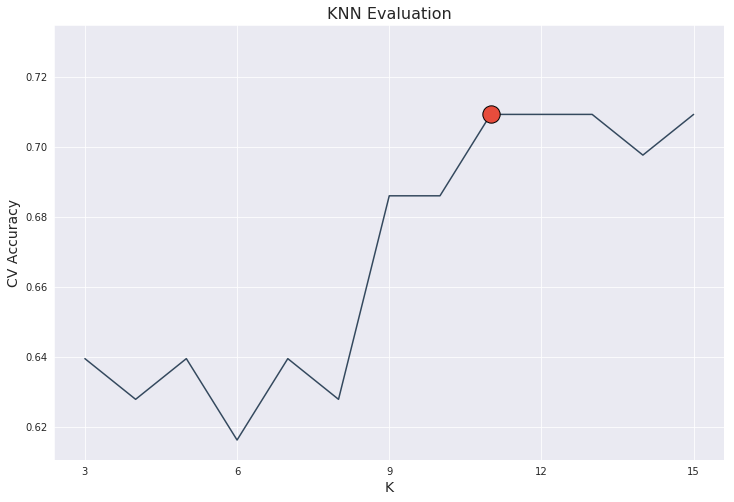

BEST K=11 || BEST ACC=0.7093023255813954


In [36]:
plt.figure(figsize=(12,8))
plt.tight_layout()
sns.set_style('darkgrid')
plt.title('KNN Evaluation', fontsize=16)
plt.xticks(np.linspace(min(xplot), max(xplot), 5))
plt.xlabel('K', fontsize=14)
plt.ylabel('CV Accuracy', fontsize=14)
plt.scatter(xmax, ymax, color='#e74c3c', s=300, edgecolor='black', zorder=2)
plt.plot(xplot, yplot, color='#34495e', zorder=1)
plt.show()
print('BEST K={} || BEST ACC={}'.format(xmax, ymax))

In [37]:
# Fit the best model:
knn_fit.fit(X_train,y_train)
yhat = knn_fit.predict(X_test)

In [38]:
# Evaluate the best model:
knn_d = {'Algorithm': 'KNN',
         'Jaccard Similarity': jaccard_similarity_score(y_test, yhat), 
         'F1-Score': f1_score(y_test, yhat, average='weighted'),
         'LogLoss': 'NA'}
knn_d

{'Algorithm': 'KNN',
 'Jaccard Similarity': 0.7093023255813954,
 'F1-Score': 0.6922534022073755,
 'LogLoss': 'NA'}

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtr = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
yhat = dtr.predict(X_test)

In [41]:
dtr_d = {'Algorithm': 'Decision Tree',
         'Jaccard Similarity': jaccard_similarity_score(y_test, yhat), 
         'F1-Score': f1_score(y_test, yhat, average='weighted'),
         'LogLoss': 'NA'}
dtr_d

{'Algorithm': 'Decision Tree',
 'Jaccard Similarity': 0.6627906976744186,
 'F1-Score': 0.6605522018802573,
 'LogLoss': 'NA'}

# Support Vector Machine

In [42]:
from sklearn.svm import SVC

In [43]:
svc = SVC(C=100, kernel='rbf', gamma='auto').fit(X_train, y_train)
yhat = svc.predict(X_test)
svc_d = {'Algorithm': 'SVM',
         'Jaccard Similarity': jaccard_similarity_score(y_test, yhat),
         'F1-Score': f1_score(y_test, yhat, average='weighted'),
         'LogLoss': 'NA'}
svc_d

{'Algorithm': 'SVM',
 'Jaccard Similarity': 0.6627906976744186,
 'F1-Score': 0.6605522018802573,
 'LogLoss': 'NA'}

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [45]:
lr = LogisticRegression(C=1, solver='liblinear').fit(X_train, y_train)
yhat = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)
log_d = {'Algorithm': 'Logistic Regression',
         'Jaccard Similarity': jaccard_similarity_score(y_test, yhat),
         'F1-Score': f1_score(y_test, yhat, average='weighted'),
         'LogLoss': log_loss(y_test, y_prob)}
log_d

{'Algorithm': 'Logistic Regression',
 'Jaccard Similarity': 0.686046511627907,
 'F1-Score': 0.5866880513231756,
 'LogLoss': 0.543254612334214}

In [46]:
log2 = LogisticRegression(C=10, solver='lbfgs', penalty='l2').fit(X_train, y_train)
yhat = log2.predict(X_test)
y_prob = log2.predict_proba(X_test)
log2_d = {'Algorithm': 'Logistic Regression',
         'Jaccard Similarity': jaccard_similarity_score(y_test, yhat),
         'F1-Score': f1_score(y_test, yhat, average='weighted'),
         'LogLoss': log_loss(y_test, y_prob)}
log2_d

{'Algorithm': 'Logistic Regression',
 'Jaccard Similarity': 0.6627906976744186,
 'F1-Score': 0.5747275979834119,
 'LogLoss': 0.5898113547703943}

In [47]:
log3 = LogisticRegression(C=10, solver='liblinear', penalty='l1').fit(X_train, y_train)
yhat = log3.predict(X_test)
y_prob = log3.predict_proba(X_test)
log3_d = {'Algorithm': 'Logistic Regression',
         'Jaccard Similarity': jaccard_similarity_score(y_test, yhat),
         'F1-Score': f1_score(y_test, yhat, average='weighted'),
         'LogLoss': log_loss(y_test, y_prob)}
log3_d

{'Algorithm': 'Logistic Regression',
 'Jaccard Similarity': 0.6627906976744186,
 'F1-Score': 0.6555331746322407,
 'LogLoss': 0.5928836262346837}

In [48]:
log4 = LogisticRegression(C=10, solver='lbfgs', penalty='l2', multi_class='multinomial').fit(X_train, y_train)
yhat = log4.predict(X_test)
y_prob = log4.predict_proba(X_test)
log4_d = {'Algorithm': 'Logistic Regression',
         'Jaccard Similarity': jaccard_similarity_score(y_test, yhat),
         'F1-Score': f1_score(y_test, yhat, average='weighted'),
         'LogLoss': log_loss(y_test, y_prob)}
log4_d

{'Algorithm': 'Logistic Regression',
 'Jaccard Similarity': 0.6627906976744186,
 'F1-Score': 0.6555331746322407,
 'LogLoss': 0.5960589859619643}

Will use the first model.

# Model Evaluation using Test set

First, download and load the test set:

In [49]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-03-20 21:57:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-03-20 21:57:08 (395 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [50]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [51]:
len(test_df)

54

In [52]:
# Make the data the same as the training data:
def make_test_match(data):
    data = data[data['education'] != 'Master or Above']
    # Date-Time Transformations:
    data['due_date'] = pd.to_datetime(data['due_date'])
    data['effective_date'] = pd.to_datetime(data['effective_date'])
    data['dayofweek'] = data['effective_date'].dt.dayofweek
    data['weekend'] = data['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
    
    # Loan Date Changes:
    data['due_date'] = pd.to_datetime(data['due_date'])
    data['loan_length'] = (data['due_date'] - data['effective_date'])
    data['loan_length'] = data['loan_length'].apply(lambda x: x.days)
    data['terms'] = data['terms'].apply(lambda x: np.where(x > 15, '>15', '<=15'))
    data['month+'] = data['loan_length'].apply(lambda x: int(np.where(x >= 29, 1, 0)))
    
    # Encoding:
    data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
    data['terms'].replace(to_replace=['>15','<=15'], value=[0,1],inplace=True)
    
    
    # Dummies:
    feats = data[['Gender', 'terms', 'month+', 'weekend']]
    feats = pd.concat([feats, pd.get_dummies(data['education'])], axis=1)
    
    # y
    y_data = data['loan_status'].values
    
    return (feats, y_data)
    

In [53]:
test_data = make_test_match(test_df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [54]:
X_test_data, y_test_data = test_data

In [55]:
X_test_data.head()

,Gender,terms,month+,weekend,Bechalor,High School or Below,college
0,1,0,1,0,1,0,0
2,1,0,1,1,0,1,0
3,0,0,1,1,0,0,1
4,0,1,0,1,1,0,0
5,0,1,0,1,0,1,0


In [56]:
y_test_data[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [57]:
X_test_data.columns == X.columns

array([ True,  True,  True,  True,  True,  True,  True])

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [58]:
k_pred = knn_fit.predict(X_test_data)
k_jaccard = jaccard_similarity_score(y_test_data, k_pred)
k_f1 = f1_score(y_test_data, k_pred, average='weighted')
ks = {'Algorithm': 'KNN', 'Jaccard': k_jaccard, 'F1-Score': k_f1, 'LogLoss': 'NA'}

dtr_pred = dtr.predict(X_test_data)
dtr_jaccard = jaccard_similarity_score(y_test_data, dtr_pred)
dtr_f1 = f1_score(y_test_data, dtr_pred, average='weighted')
ts = {'Algorithm': 'Decision Tree', 'Jaccard': dtr_jaccard, 'F1-Score': dtr_f1, 'LogLoss': 'NA'}

svc_pred = svc.predict(X_test_data)
svc_jaccard = jaccard_similarity_score(y_test_data, svc_pred)
svc_f1 = f1_score(y_test_data, svc_pred, average='weighted')
svs = {'Algorithm': 'SVM', 'Jaccard': svc_jaccard, 'F1-Score': svc_f1, 'LogLoss': 'NA'}

log_pred = lr.predict(X_test_data)
log_jaccard = jaccard_similarity_score(y_test_data, log_pred)
log_f1 = f1_score(y_test_data, log_pred, average='weighted')
log_logloss = log_loss(y_test_data, lr.predict_proba(X_test_data))
lrs = {'Algorithm': 'Logistic Regression', 'Jaccard': log_jaccard, 'F1-Score': log_f1, 'LogLoss': log_logloss}

rep = pd.DataFrame([ks, ts, svs, lrs])

In [59]:
rep.set_index('Algorithm')

,F1-Score,Jaccard,LogLoss
Algorithm,,,
KNN,0.762125,0.788462,NA
Decision Tree,0.723866,0.730769,NA
SVM,0.723866,0.730769,NA
Logistic Regression,0.597902,0.692308,0.505509


# Conclusion
The final answer is plugged in below:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.76    | 0.79     | NA      |
| Decision Tree      | 0.72    | 0.73     | NA      |
| SVM                | 0.72    | 0.73     | NA      |
| LogisticRegression | 0.59    | 0.69     | 0.50    |

**Conclusion:** the *KNN model* is the best solution, as given by its F1 and Jaccard scores. I arrived at these results after considerable time adjusting the feature set. I made these predictions with all binary features.
Here are my concluding observations:
- It's difficult to train models on these data for 2 reasons: (1.) imbalanced classes; and (2.) a lack of significant variance among features.
- Overfitting appears to be an issue: the algorithms often refuse to assign class *COLLECTION*. 
- Because I did not specify a radom state when training the models, if you re-run these tests, you might be flagged with an F1-score error due to its failure to predict any negative classes.

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>